# Answer template

Please use this notebook for your coursework. Feel free to add more cells for your code and answers, but try to stick to this format. This will make it easier to mark everyone's work fairly.

___________________

In [4]:
# run this
!pip list

Package                       Version
----------------------------- ------------
aiobotocore                   2.5.0
aiofiles                      22.1.0
aiohttp                       3.8.5
aioitertools                  0.7.1
aiosignal                     1.2.0
aiosqlite                     0.18.0
alabaster                     0.7.12
anaconda-anon-usage           0.4.2
anaconda-catalogs             0.2.0
anaconda-client               1.12.1
anaconda-cloud-auth           0.1.3
anaconda-navigator            2.5.1
anaconda-project              0.11.1
anyio                         3.5.0
appdirs                       1.4.4
applaunchservices             0.3.0
appnope                       0.1.2
appscript                     1.1.2
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arrow                         1.2.3
astroid                       2.14.2
astropy                       5.1
asttokens                     2.0.5
async-timeout                 4.0.2
atomicwrites 

whatthepatch                  1.0.2
wheel                         0.38.4
widgetsnbextension            4.0.5
wrapt                         1.14.1
wurlitzer                     3.0.2
xarray                        2023.6.0
xlwings                       0.29.1
xxhash                        2.0.2
xyzservices                   2022.9.0
y-py                          0.5.9
yapf                          0.31.0
yarl                          1.8.1
ypy-websocket                 0.8.2
zict                          2.2.0
zipp                          3.11.0
zope.interface                5.4.0
zstandard                     0.19.0


# Part A – Exploratory data analysis and data visualisation

1. Using the pandas library, read the file dataset1.csv into a dataframe. Print or display the first five rows of the dataset. [1 mark]

In [5]:
# code here
import pandas as pd
d1 = pd.read_csv("dataset1.csv")
d1.head()

,Monastery,Latitude,Longitude,City,Country,Administrative Region,Historical Region,Starting,Ending,Monastery_index
0,Cistercians,47.13,15.28,Seckau,Austria,Steiermark,STYRIA (AUSTRIA),1130,1958,0
1,Cistercians,48.05,16.13,Vienne,Austria,Niederoesterreich,STYRIA (AUSTRIA),1135,2011,0
2,Cistercians,48.61,15.20,Sanct Pölten,Austria,Niederoesterreich,STYRIA (AUSTRIA),1138,2011,0
3,Cistercians,48.20,14.74,Linz,Austria,Oberoesterreich,STYRIA (AUSTRIA),1142,1784,0
4,Cistercians,48.32,14.17,Linz,Austria,Oberoesterreich,STYRIA (AUSTRIA),1146,1945,0


2. Make a scatterplot from the dataset, with the Longitude column on the x axis, the Latitude column on the y axis, and the colour corresponding to the Monastery_index column. Within the scatterplot function, set the colour map to ’rainbow’. The result should be a scatterplot showing the position of every monastery, with different colours for monasteries with different values in Monastery_index.  [1 mark]

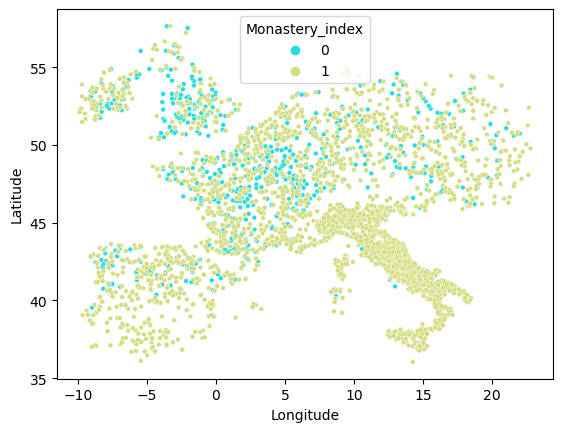

In [6]:
# code here
from seaborn.widgets import color_palette
import matplotlib.pyplot as plt
import seaborn as sns
sns.scatterplot(data=d1, x="Longitude",y="Latitude", hue="Monastery_index" , palette="rainbow", s=12);

3. Plot a histogram for the monastery starting year of activity, represented in the Starting column.
Add the title “Starting year” to the plot. [1 mark]

[Text(0.5, 1.0, 'Starting Year')]

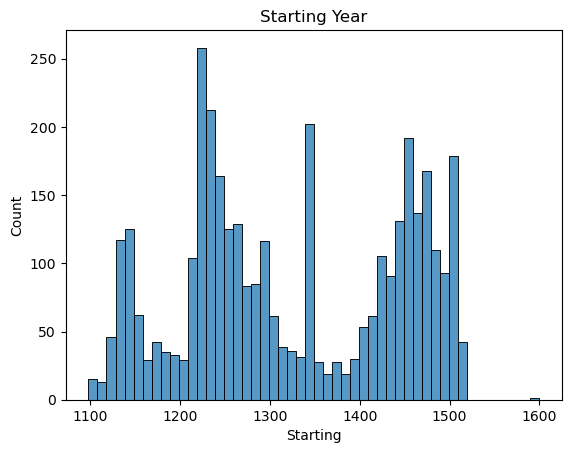

In [7]:
# code here
sns.histplot(data=d1, x="Starting", bins=50).set(title="Starting Year")

4. Make a figure with two histograms, still using the Starting column:

a) One histogram representing the Cistercian monasteries, corresponding to rows in the dataframe where the Monastery column is equal to 'Cistercians'.

b) And one histogram representing the Franciscan monasteries, corresponding to rows in the dataframe where the Monastery column is equal to 'Franciscans'.

c) Add a legend indicating which histogram corresponds to which type of monastery.

d) Add the title “Starting year” to the figure.

[2 marks]

[Text(0.5, 1.0, 'Starting Year')]

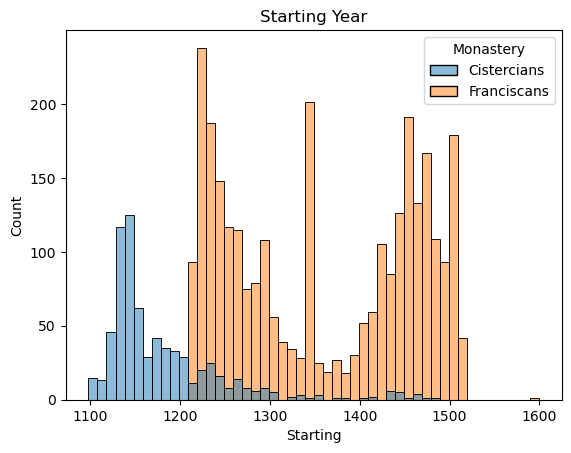

In [8]:
# code here
sns.histplot(data=d1, x="Starting", hue="Monastery", bins=50).set(title="Starting Year")

5. Repeat numbers 3 and 4, but for the Ending column. Add the title “Ending year” to the plot.
[2 marks]

[Text(0.5, 1.0, 'Ending Year')]

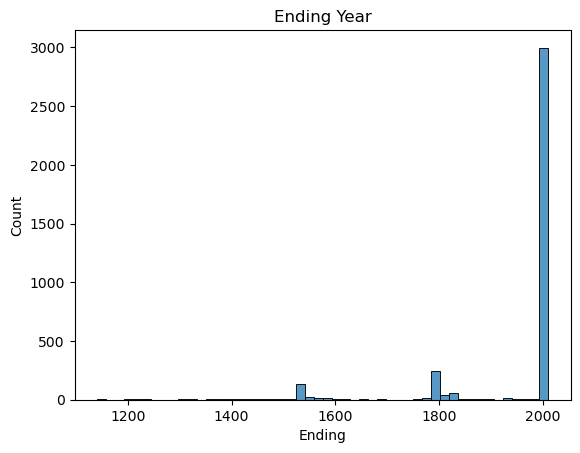

In [9]:
sns.histplot(data=d1, x="Ending", bins=50).set(title="Ending Year")

[Text(0.5, 1.0, 'Ending Year')]

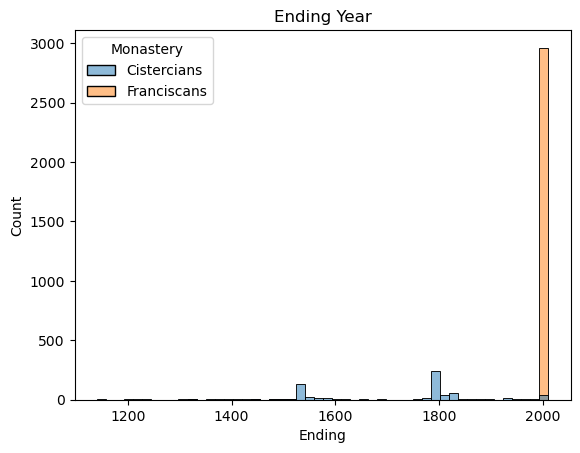

In [10]:
# code here
sns.histplot(data=d1, x="Ending", hue="Monastery", bins=50).set(title="Ending Year")

6. Count the number of times each country appears in the Country column. Use that to make a bar plot, showing one bar for each country, with the bar height representing how many times each country appears in the Country column. This corresponds to the number of monasteries found in each country.
[2 marks]

<Axes: xlabel='count', ylabel='Country'>

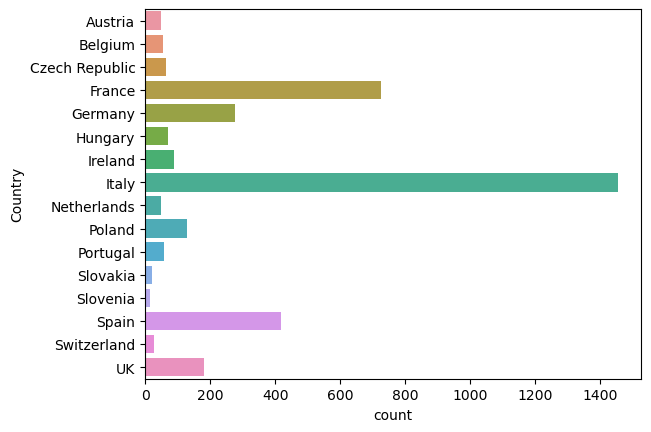

In [11]:
# Code here
# Sideways because the country names were overlapping vertically
sns.countplot(d1, y="Country")

_____________________

# Part B – Training classifiers

7.	Define a variable X corresponding to the Starting and Ending columns of the dataset, and a variable y corresponding to the Monastery_index column. [1 mark]

In [12]:
# Code here
x = d1[["Starting", "Ending"]]
y = d1["Monastery_index"]

8.	Perform a train-test split, separating X and y into a training test and a test set, leaving 33% of the data in the test set. [1 mark]

In [13]:
# Code here
from sklearn.model_selection import train_test_split
X_Train, X_Test, y_Train, y_Test =  train_test_split(x,y, test_size=0.33, random_state=0)

9.	Classification using a Perceptron:

a)	Fit a perceptron to the training data, and use it to predict y values for the test set.
[1 mark]

b)	Calculate the fraction of data points in the test set where the predicted y values and the actual y values differ. This fraction should be equal to zero if the prediction is perfect, and equal to 1 if the prediction is wrong for 100% of the test set. Print the value of that fraction in decimals (like 0.01, 0.2394, or 0.9999923).  [2 marks]

c)	Plot a confusion matrix showing how well the classifier performs on the test set. [1 mark]

d)	Treating “Franciscan” as “Positive” and “Cistercian” as “Negative”, Print out the precision, recall, accuracy and F1 score of the perceptron. [2 marks]

In [14]:
# Code here
# Part A
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score
p = Perceptron(random_state=1)
p.fit(X_Train, y_Train)

y_Pred = p.predict(X_Test)

print(y_Pred)

[1 1 1 ... 1 1 1]


In [15]:
# Part B
test_score = accuracy_score(y_Pred, y_Test)

# 1-test_score because closer to 0 means a better prediction
differing_fraction = 1 - test_score
print(f"{differing_fraction:.4f}")

0.2043


<Axes: >

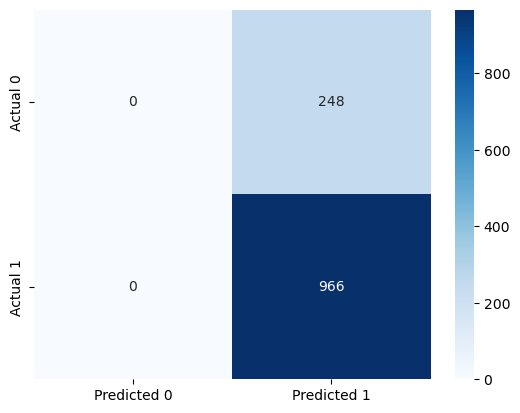

In [16]:
# Part C
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_Test, y_Pred)
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d", xticklabels=["Predicted 0", "Predicted 1"], yticklabels=["Actual 0", "Actual 1"])

In [17]:
# Part D
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

precision = precision_score(y_Test, y_Pred)
recall = recall_score(y_Test, y_Pred)
accuracy = accuracy_score(y_Test, y_Pred)
f1 = f1_score(y_Test, y_Pred)

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Score: {f1:.4f}")

Precision: 0.7957
Recall: 1.0000
Accuracy: 0.7957
F1 Score: 0.8862


10.	Classification using Logistic Regression: do the same as the question above, but using the logistic regression classifier. [4 marks]

In [18]:
# Code here
# Part A
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
lr = LogisticRegression()
lr.fit(X_Train, y_Train)

y_Pred = lr.predict(X_Test)

print(y_Pred)

[0 1 1 ... 1 1 1]


In [19]:
# Part B

test_score = accuracy_score(y_Pred, y_Test)
differing_fraction = 1 - test_score
print(f"{differing_fraction:.4f}")

0.0239


<Axes: >

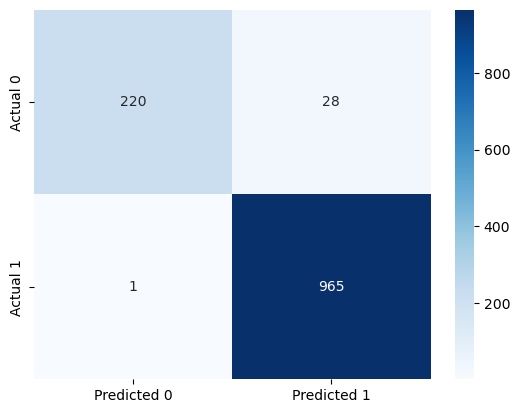

In [20]:
# Part C
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_Test, y_Pred)
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d", xticklabels=["Predicted 0", "Predicted 1"], yticklabels=["Actual 0", "Actual 1"])

In [21]:
# Part D
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

precision = precision_score(y_Test, y_Pred)
recall = recall_score(y_Test, y_Pred)
accuracy = accuracy_score(y_Test, y_Pred)
f1 = f1_score(y_Test, y_Pred)

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Score: {f1:.4f}")

Precision: 0.9718
Recall: 0.9990
Accuracy: 0.9761
F1 Score: 0.9852


For open-ended questions like the ones below, write your answers in a new cell of code, either as a commented-out line starting with #, or as a markdown cell. Indicate what question you’re answering, by copying the question as well. For example:

11.	Explain the importance of the train-test split in machine learning. What might happen if you don’t have a proper split? [ 2 marks ]

A train test split is very important as it shows how well the model can generalise and how accurate the model is in general. A proper split can assess the model's ability to adapt to different scenarios and accurately make predictions. If you dont have a proper train test split, it may not generalise as well and can overfit or underfit.

12.	Which classifier (Perceptron or Logistic Regression) performed better at this task? Explain how you’ve arrived at this answer. [4 marks]

Logistic regression performed better at this task, because looking at the confusion matrix, it predicts much more accurately than the Perceptron classifier. The logistic regression predicts very accurately, with only a few exceptions, whereas the perceptron predicts all values as 1, and so about 1/5th of the values were incorrectly predicted. The Perceptron has an accuracy of about 80% whilst the Logistic Regression model has an accuracy of about 97% which is much better. The perceptron is saved however by the fact that most values were in fact a 1 so by chance it predicted most of them correctly.

13.	If you run the code from questions 8, 9, and 10 again, do the scores (precision, recall, accuracy, F1) change? Why (or why not)? Explain where those scores come from, and how do they change (or don't change) if you run the code again. [3 marks]

The scores dont change, as I have set the random_state on the train test split. This makes it so that it provides the same scores every single time. However, if I did not include that part, the results would change, due to the fact that the train test split would take random data every single time, and thus would come up with different conclusions and would generalise differently every time. The different scores could increase or decrease depending on pure chance.

_______________

# Part C – Linear Regression

14. Read the file `dataset2.csv` into a dataframe. Make four scatterplots, with different variables (different columns) on the x and y axes, with the variable `quality` on the colour axis. For each scatterplot, choose a different pair of x and y variables, which cannot include `quality`. [1 mark]

<Axes: xlabel='total sulfur dioxide', ylabel='density'>

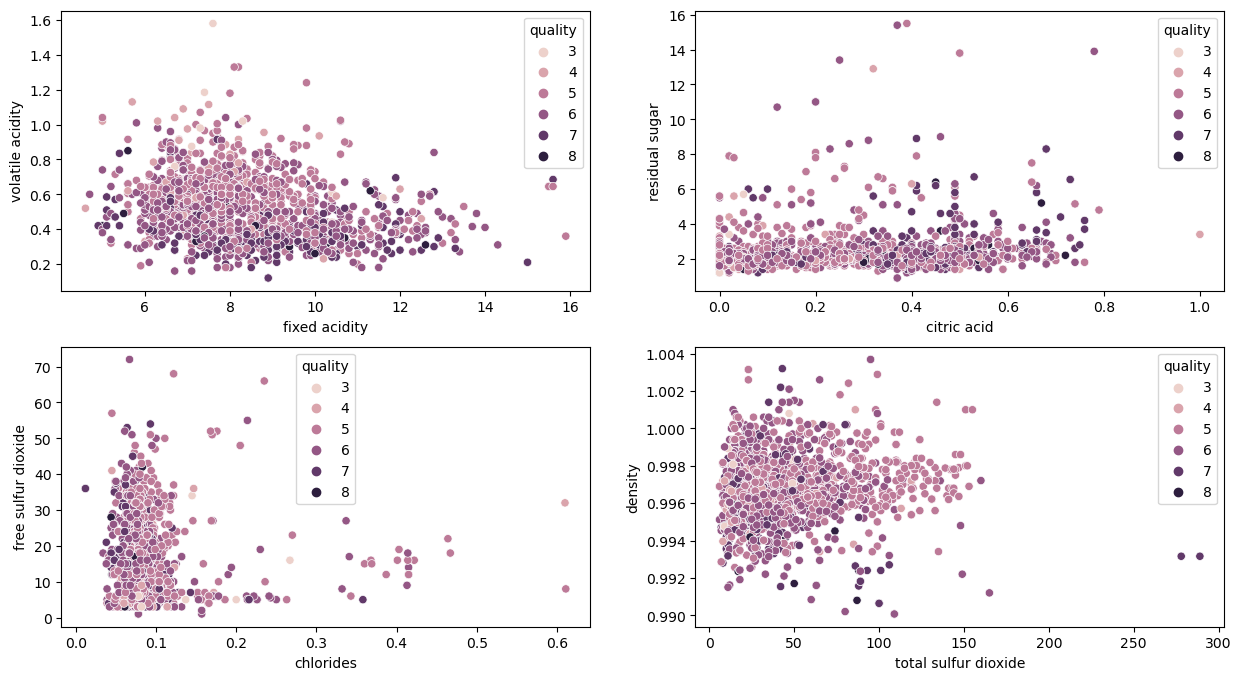

In [22]:
# Code here
import pandas as pd
d2 = pd.read_csv("dataset2.csv")
d2.head()

fig,ax=plt.subplots(2,2,figsize=(15,8))
sns.scatterplot(data=d2, x="fixed acidity", y="volatile acidity", hue="quality",ax=ax[0,0])
sns.scatterplot(data=d2, x="citric acid", y="residual sugar", hue="quality",ax=ax[0,1])
sns.scatterplot(data=d2, x="chlorides", y="free sulfur dioxide", hue="quality",ax=ax[1,0])
sns.scatterplot(data=d2, x="total sulfur dioxide", y="density", hue="quality",ax=ax[1,1])


15. Print the Pearson correlation between the pairs of variables you have included in the scatterplots.
For every pair of variables, print the names of the variables, and the corresponding correlation.
[1 mark]

In [23]:
# Code here
from scipy import stats

print(f"fixed acidity - volatile acidity: {stats.pearsonr(d2['fixed acidity'], d2['volatile acidity'])}\n")
print(f"citric acid - residual sugar: {stats.pearsonr(d2['citric acid'], d2['residual sugar'])}\n")
print(f"chlorides - free sulfur dioxide: {stats.pearsonr(d2['chlorides'], d2['free sulfur dioxide'])}\n")
print(f"total sulfur dioxide - density: {stats.pearsonr(d2['total sulfur dioxide'], d2['density'])}\n")


fixed acidity - volatile acidity: PearsonRResult(statistic=-0.25613089477038214, pvalue=2.276720443176599e-25)

citric acid - residual sugar: PearsonRResult(statistic=0.14357716157031417, pvalue=8.08372319006419e-09)

chlorides - free sulfur dioxide: PearsonRResult(statistic=0.005562147004781123, pvalue=0.8241238441622867)

total sulfur dioxide - density: PearsonRResult(statistic=0.07126947620310317, pvalue=0.004354283989412013)



16. Linear regression: [2 marks]
    
a) Choosing the input variable X corresponds to any three columns of the dataset, except for `quality`, and the variable y corresponds to the `quality` column.

b) Fit a linear regression between X and y.

c) Print out the R2 score of the linear regression.

d) Print out the linear regression model’s slope coefficients and intercept.

In [24]:
# Code here
# Part A

X = d2[["chlorides", "volatile acidity", "citric acid"]]
y = d2["quality"]

In [25]:
# Part B

from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X,y)

LinearRegression()

In [26]:
#Part C

R2 = lin_reg.score(X,y)
print(f"R2 score: {R2}")

R2 score: 0.16558503543527525


In [27]:
#Part D

print(f"Slope: {lin_reg.coef_}")
print(f"Intercept: {lin_reg.intercept_}")

Slope: [-2.03649253 -1.58945951  0.23153251]
Intercept: 6.590357145910179


17. K-fold cross-validation [3 marks]

a) Using the same X and y variables defined in the question above, perform a K-fold cross-validation of the linear regression model, with K = 10.

b) For each fold, calculate the R2 score.

c) Print the mean and standard deviation of the five R2 scores.

In [28]:
# Code here
#Part A and B
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

k_fold = KFold(n_splits=10, random_state=42, shuffle=True)
cross_val = cross_val_score(lin_reg, X, y, scoring="r2", cv=k_fold)

print(cross_val)

[0.18896921 0.21239623 0.12669417 0.10735274 0.15099022 0.07063946
 0.13165178 0.15330883 0.24818748 0.20206174]


In [29]:
#Part C
from statistics import mean, stdev

print(f"Mean: {mean(cross_val)}")
print(f"Standard Deviation: {stdev(cross_val)}")

Mean: 0.15922518512562642
Standard Deviation: 0.053666340830861824


18.	If, rather than choosing three columns, you had used more columns to predict quality, would the R2 score of your model necessarily be higher? Why/why not? In which circumstances would it be higher or not? (Feel free to try it! But please provide a justification for your answer) [3 marks]



The R2 score would not necessarily be higher, as some features may not be as relevant, and could infact decrease the R2 score. This is because it could introduce noise which would decrease the models generalisation and could infact make it overfit. This has already happened with my model, as my column (X) values are not as relevant to eachother and thus I only have an R2 score of 0.16.

The R2 score would be much higher if the column features were relevant. It could help the model capture the pattern of the data, however finding relevant features could be difficult, and could require expertise in the data, or could use a method like variance thresholding to calculate and remove subpar variables whicbh would decrease the R2 score of the model.

19.	Imagine you have two linear regressions, one with R2 = 0.80 and another with R2 = 0.90. Under what circumstances would the first model be preferable over the second one? What if instead you had two classifiers, one with accuracy = 80% and another with accuracy = 90%? [3 marks]

The one with R2 of 0.80 may be preferable is if it is much simpler than the R2 with 0.9. It would also be more preferable if it uses much less computing power if being computed on a less powerful machine. This model could also be made more complex later on to fit the users needs. This model may also be faster than model 2 due to its simpler complexity.

A classifier with accuracy of 80% may also be preferable for similar reasons as above. It may also generalise better as the second classifier may overfit on new, unseen data.

_____________________

# Part D – Clustering

20. K-means clustering:

a) Read the file `dataset3.csv` into a dataframe.

b) Define a variable X corresponding to the `Longitude` and `Latitude` columns of the dataset.

c) Using the K-means clustering algorithm and the variable X, cluster the trees 3 times, using k = 5, 10, 15.

d) Make a scatterplot showing the results of each clustering, with one colour for each cluster.
Suggestion: use a categorical colour map such as tab10 or tab20.
[2 marks]

In [30]:
# Code here
# Part A
import pandas as pd
d3 = pd.read_csv("dataset3.csv")
d3.head()

,Tree_ID,Address,Town,Tree_Species,Species_Desc,Common_Name,Age_Desc,Height,Spread,Trunk,Actual_Trunk,Condition,Latitude,Longitude
0,27092,"Clonard Court, Balbriggan",Balbriggan,ACSA,Acer saccharinum,Silver Maple,Semi-Mature,5.1-10 metres,3 to 6 metres,11cm to 20cm,18cm,Good,53.606325,-6.186424
1,29144,"Ridgewood Avenue, Forrest Great",Swords South,TICO,Tilia cordata,Small-Leafed Lime,Young,Up to 5 metres,Up to 3 metres,1cm - 10cm,10cm,Fair - Poor,53.447465,-6.247613
2,29160,"Ridgewood Avenue, Forrest Great",Swords South,TICO,Tilia cordata,Small-Leafed Lime,Young,Up to 5 metres,Up to 3 metres,11cm to 20cm,11cm,Good,53.447695,-6.248258
3,29400,"Ridgewood Avenue, Forrest Great",Swords South,TICO,Tilia cordata,Small-Leafed Lime,Young,Up to 5 metres,Up to 3 metres,1cm - 10cm,10cm,Good,53.445606,-6.246236
4,246560,"Lanesborough Grove, Saint Margaret's",Santry,TICO,Tilia cordata,Small-Leafed Lime,Young,Up to 5 metres,3 to 6 metres,11cm to 20cm,13cm,Fair to Good,53.404309,-6.291646


In [31]:
# Part B
X = d3[["Latitude", "Longitude"]]

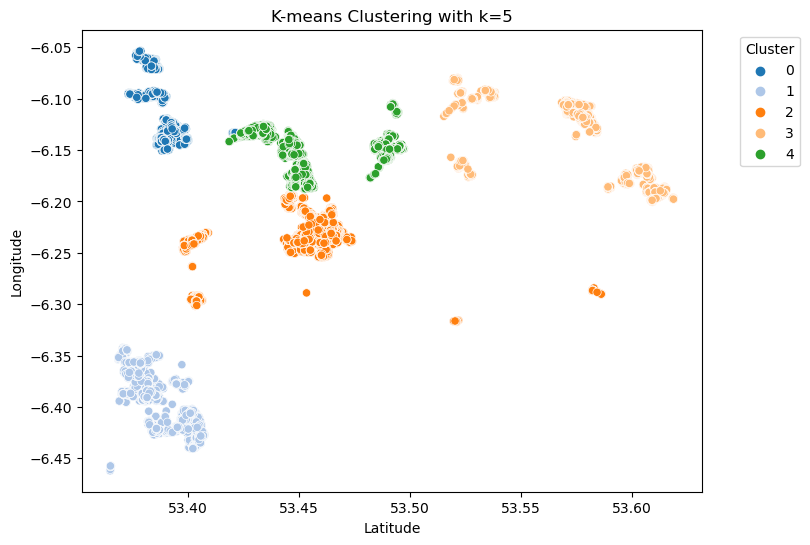

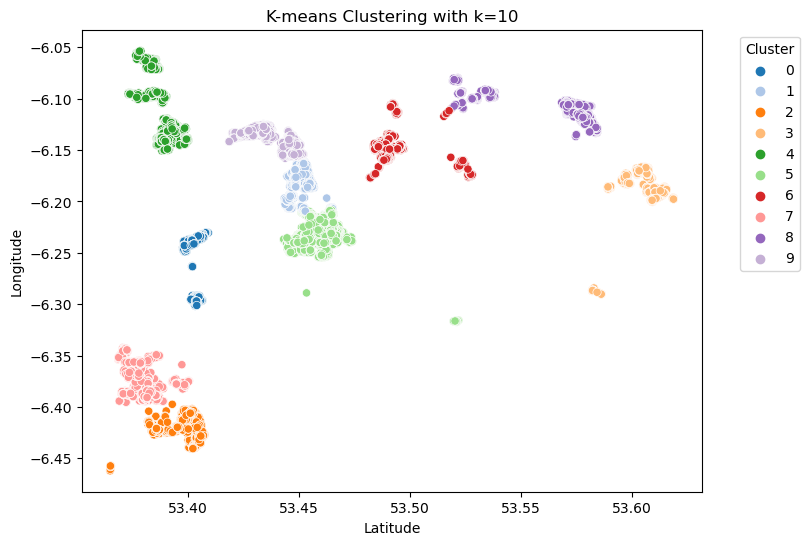

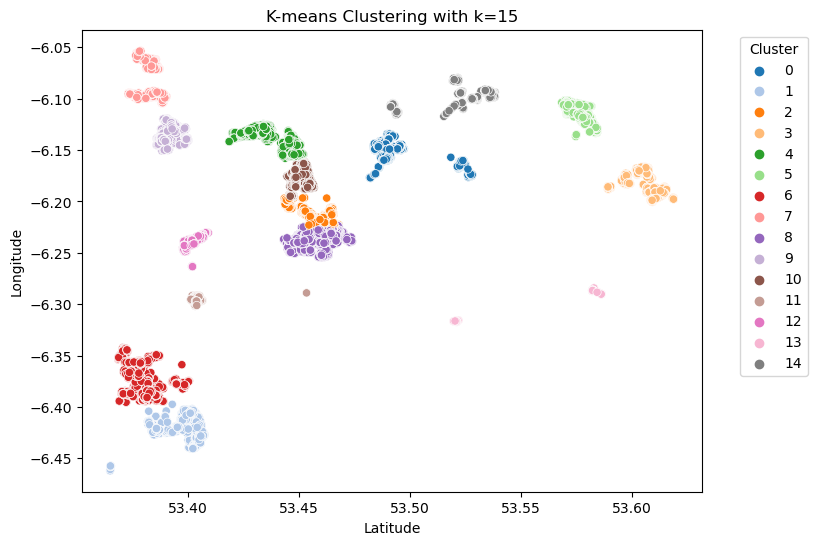

In [37]:
# Part C and D
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score

# IGNORES WARNINGS WHICH WERE SHOWING BEFORE
import warnings
warnings.filterwarnings("ignore")

kmeans_silhouette = []
kmeans_bouldin = []

for k in [5, 10, 15]:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(X)

    # Add cluster labels to the dataset (So I can sort the data into colours based on which cluster they are in)
    # Using 'hue' a few lines below
    d3[f"Cluster_{k}"] = cluster_labels

    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=d3, x="Latitude", y="Longitude", hue=f"Cluster_{k}", palette="tab20", legend="full")
    plt.title(f"K-means Clustering with k={k}")
    plt.ylabel("Longitude")
    plt.xlabel("Latitude")
    plt.legend(title="Cluster", bbox_to_anchor=(1.05, 1), loc="upper left")

    kmeans_silhouette.append(silhouette_score(X, cluster_labels))
    kmeans_bouldin.append(davies_bouldin_score(X, cluster_labels))


21. DBSCAN clustering:

a) Using the same X variable as above, using the DBSCAN clustering algorithm, cluster the trees a total of 4 times, setting the eps parameter to 0.001, 0.005, 0.01, 0.05.

b) Make a scatterplot showing the results of each clustering, with one colour for each cluster.
Suggestion: use a categorical colour map such as tab10 or tab20.
[2 marks]

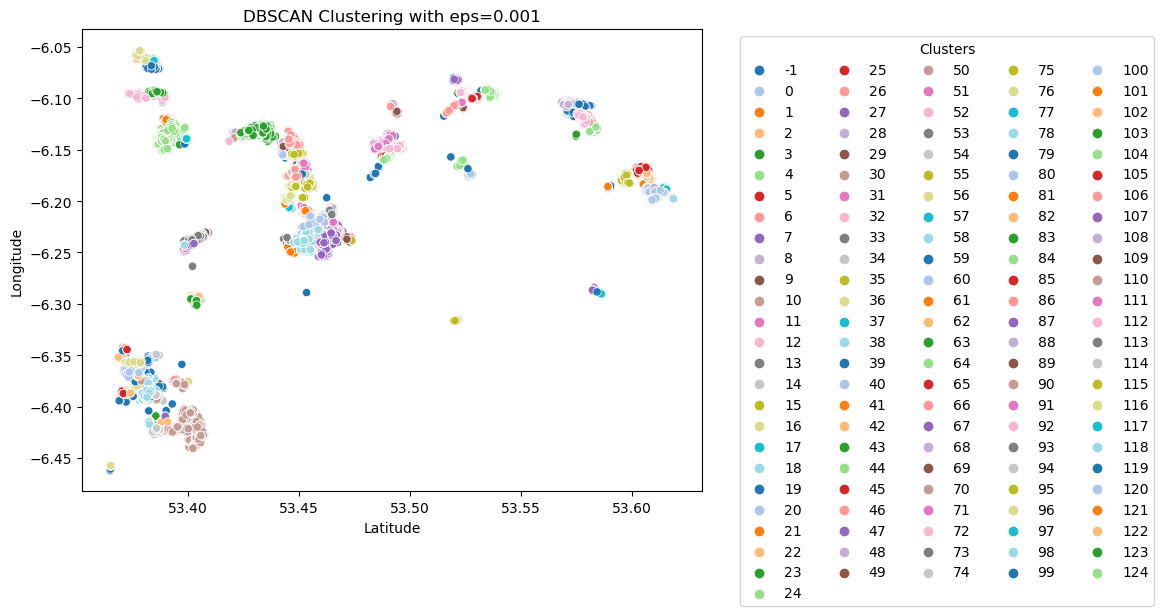

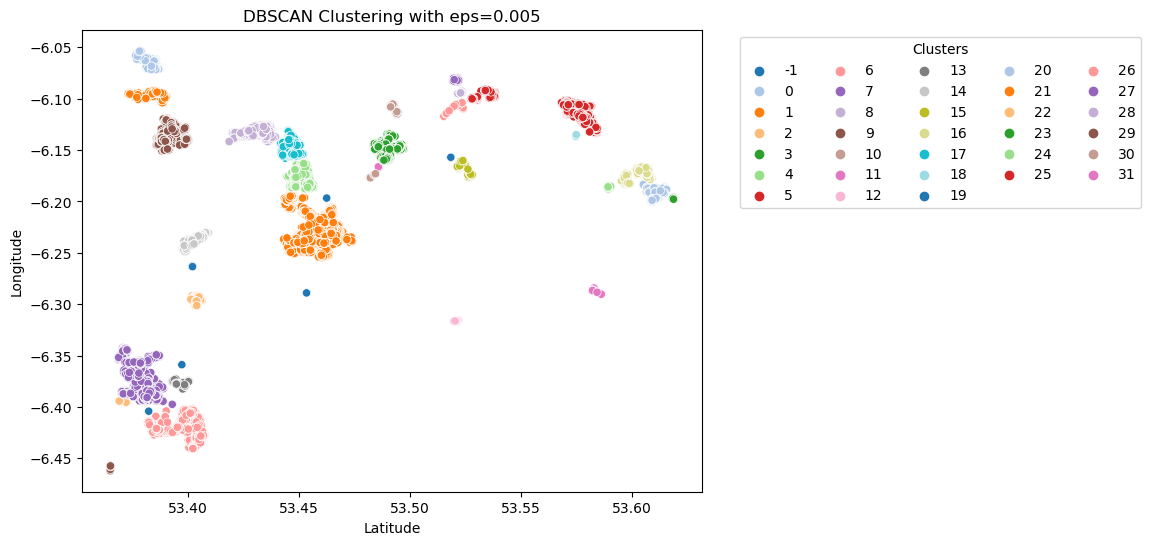

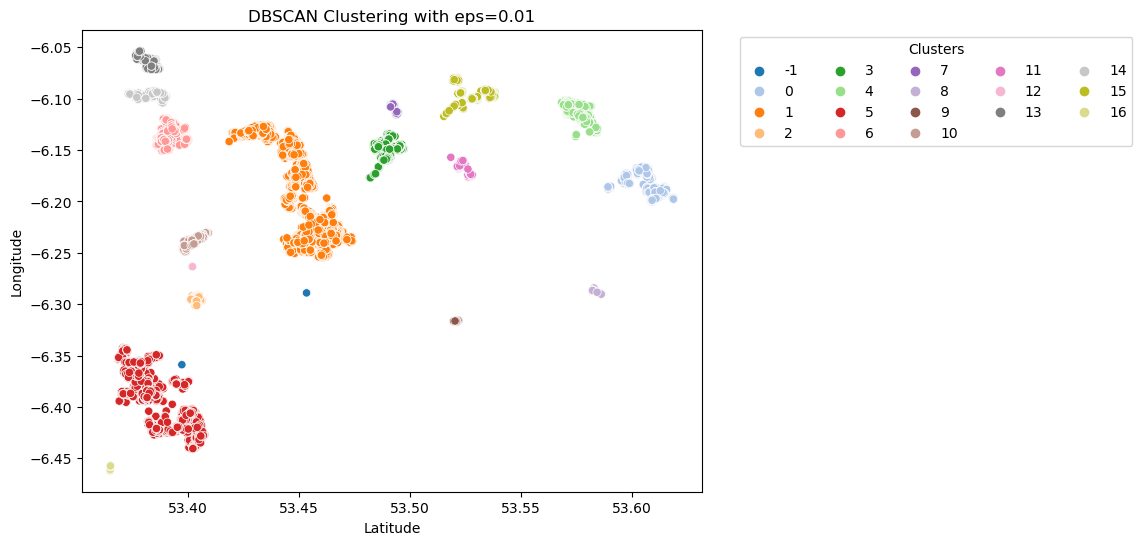

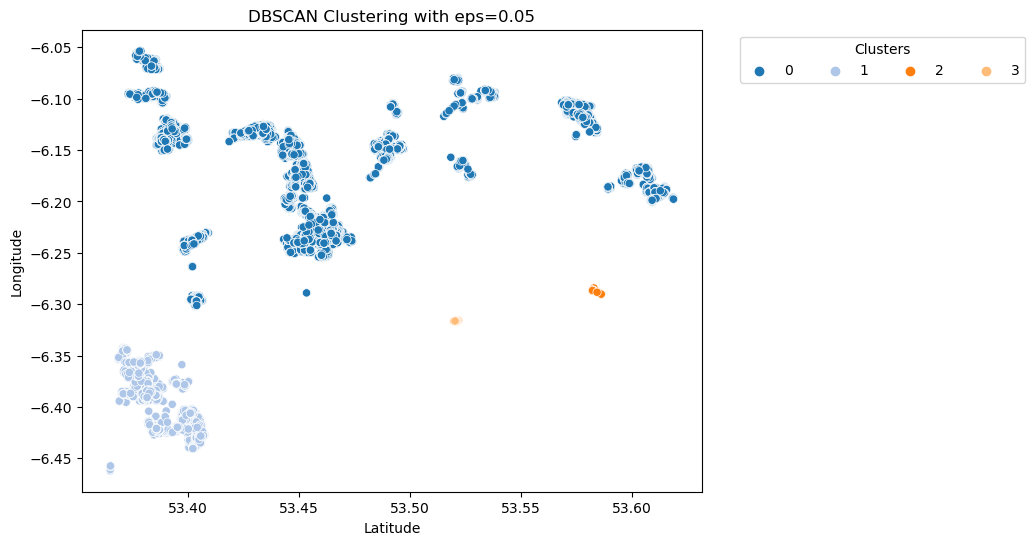

In [33]:
# Code here
# Part A
from sklearn.cluster import DBSCAN

dbscan_silhouette = []
dbscan_bouldin = []

for eps in [0.001, 0.005, 0.01, 0.05]:
    dbscan = DBSCAN(eps=eps)
    cluster_labels = dbscan.fit_predict(X)

    # Add cluster labels to the dataset
    d3[f"Cluster_eps_{eps}"] = cluster_labels

    # Create scatter plot showing the results of each clustering using Seaborn
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=d3, x="Latitude", y="Longitude", hue=f"Cluster_eps_{eps}", palette="tab20", legend="full")
    plt.title(f"DBSCAN Clustering with eps={eps}")
    plt.ylabel("Longitude")
    plt.xlabel("Latitude")
    plt.legend(title="Clusters", bbox_to_anchor=(1.05, 1), loc="upper left", ncol=5)

    dbscan_silhouette.append(silhouette_score(X, cluster_labels))
    dbscan_bouldin.append(davies_bouldin_score(X, cluster_labels))

22. Using the Silhouette score, compare the 3 runs of K-means and the 4 runs of DBSCAN. Which one of the 7 runs produces the
best clustering, according to the Silhouette score? [2 marks]

In [34]:
# Code here 🤠
i = 0
# K means Silhouette score
for k in [5, 10, 15]:
    print(f"Silhouette Score for K-means with k={k}: {kmeans_silhouette[i]}")
    i += 1

# DBScan Silhouette score
i = 0
for eps in [0.001, 0.005, 0.01, 0.05]:
    print(f"Silhouette Score for DBSCAN with eps={eps}: {dbscan_silhouette[i]}")
    i += 1

Silhouette Score for K-means with k=5: 0.5959785894734806
Silhouette Score for K-means with k=10: 0.6238164318189927
Silhouette Score for K-means with k=15: 0.6504506030172637
Silhouette Score for DBSCAN with eps=0.001: 0.24654779325742593
Silhouette Score for DBSCAN with eps=0.005: 0.5407076619832876
Silhouette Score for DBSCAN with eps=0.01: 0.39309460922449657
Silhouette Score for DBSCAN with eps=0.05: 0.4388338080445339


The third run of k-means produces the best clustering according to the Silhouette score (Higher is better).

23. Using the Davies-Bouldin score, compare the 3 runs of K-means and the 4 runs of DBSCAN. Which one of the 7 runs produces the best clustering according to the Davies-Bouldin score? [2 marks]

In [35]:
# Code here
i = 0
# K means Davies-Bouldin score
for k in [5, 10, 15]:
    print(f"Davies Bouldin Score for K-means with k={k}: {kmeans_bouldin[i]}")
    i += 1

# DBScan Davies-Bouldin score 💀
i = 0
for eps in [0.001, 0.005, 0.01, 0.05]:
    print(f"Davies Bouldin Score for DBSCAN with eps={eps}: {dbscan_bouldin[i]}")
    i += 1

Davies Bouldin Score for K-means with k=5: 0.5859319996788882
Davies Bouldin Score for K-means with k=10: 0.5333967575905957
Davies Bouldin Score for K-means with k=15: 0.450247173512791
Davies Bouldin Score for DBSCAN with eps=0.001: 1.3049809972675541
Davies Bouldin Score for DBSCAN with eps=0.005: 0.8701655709654814
Davies Bouldin Score for DBSCAN with eps=0.01: 0.5967046437384795
Davies Bouldin Score for DBSCAN with eps=0.05: 0.4451886348953754


The third run for k-means produces the best clustering according to the Davies-Bouldin score (Lower is better).

24. Using another clustering algorithm (not K-means, not DBSCAN), and a range of hyperparameter values if appropriate, cluster the trees according to their latitude and longitude, as above. According to the silhouette and Davies-Bouldin scores, does any of your model runs produce better clustering? [2 marks]

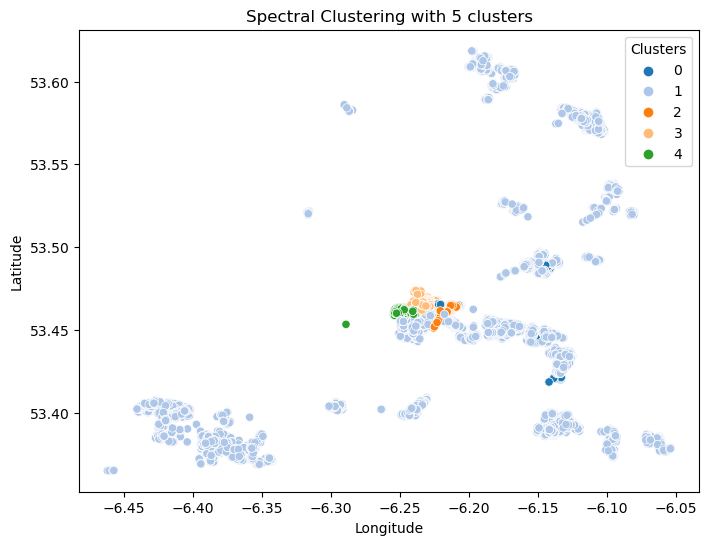

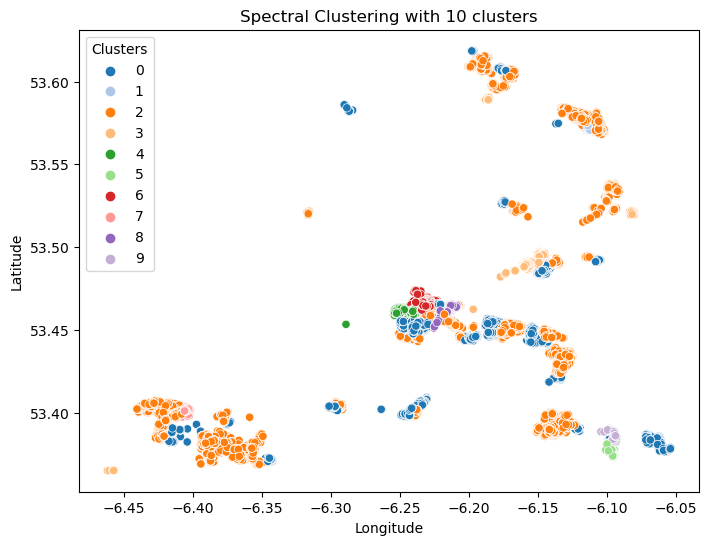

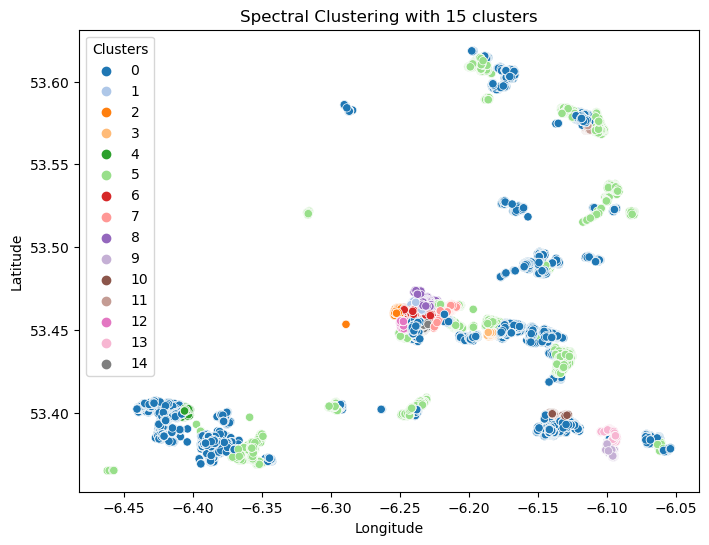

In [38]:
# Code here
from sklearn.cluster import SpectralClustering

# Using Spectral Clustering because it sounds cool 😎

spectral_silhouette = []
spectral_bouldin = []

for n_clusters in [5, 10, 15]:
    spectral = SpectralClustering(n_clusters=n_clusters, random_state=42, affinity="nearest_neighbors")
    cluster_labels = spectral.fit_predict(X)

    # Add cluster labels to the dataset
    d3[f"Cluster_Spectral_{n_clusters}"] = cluster_labels

    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=d3, x="Longitude", y="Latitude", hue=f"Cluster_Spectral_{n_clusters}", palette="tab20")
    plt.title(f"Spectral Clustering with {n_clusters} clusters")
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")
    plt.legend(title="Clusters")

    spectral_silhouette.append(silhouette_score(X, cluster_labels))
    spectral_bouldin.append(davies_bouldin_score(X, cluster_labels))

25. Usually, DBSCAN takes longer than K-means to run, and the time it takes to run is affected by the eps parameter. Explain why that is the case. [4 marks]

Whilst k-means uses circles to find and generate clusters, DBScan uses arbitrary shapes like ovals which is more complex and can take longer to compute.

K means has a Big O of O(n x k x i x d) whilst DBScan has a Big O of O(n^2) which means that DBScan will be much slower and will take longer to run for larger datasets as it is exponential.

DBScan's eps and Minpts parameter is very sensitive, as if the eps is too high, it may merge multiple clusters into one, and if the eps is too low, it may create too many small clusters, and could take points as outliers. This could increase the time taken to compute, as DBScan will have to deal with more small clusters or outliers. Too high of a Minpts could also generate too many clusters.

26. Provide an example of one case in which it might be better to use DBSCAN rather than K-means, and an example of one case in which it might be better to use K-means rather than DBSCAN. Explain why, in both cases. [4 marks]

DBScan would be better to use if clusters have more of an irregular shape (not spherical), and if there are outliers in the data. An example would be the population density of cities, where major cities could have an irregular shape and a very high density, with an outlier being a country like Russia for example with a massive land mass, but a relatively small population.

K-means would be better to use if clusters are more spherical, the number of clusters is known, and fast(er) computing speed is necessary. An example would be customer spending habits. Most spending habits have a normal distribution and therefore would have more spherical clusters.

_____________________

# Part E – Model selection

27. Consider the figure in the PDF and compare models A and B. In each case, what difference would it make to add more training examples to the training set? Explain your reasoning. [4 marks]

In model A, increasing the training set size would not change the error at all after a test size of 110. This is because  the error for the testing and the training both level out according to the graph and stay exactly the same.

However in model B, increasing the training test size would decrease the testing error, but would slowly increase the training error. According to the graph, if the training size is big enough, the error for the training could be sizeable.

28.	Consider the second figure in the PDF and compare models A, B, and C. What is the difference between the three models? How does that relate to the bias-variance trade-off? [6 marks]

Model A has a very high error for both testing and training data, which means it most likely has high bias, and as such would not be a good model.

Model B has quite low error for both testing and training data, which means it has a good bias-variance tradeoff, and so it is the best model out of the 3.

Model C has quite low training data error but very high testing data error. This means it has a very high variance, as it is not able to generalise with the testing data, and so this model would not be very good either.

29.	What is overfitting? Why is that a problem, and how can one avoid it? [3 marks]

Overfitting is where the model is too accustomed to the training data, and thus cannot generalise with the testing data. This is a problem, as if any new data is given, it will not be able to give accurate predictions. It can be avoided by decreasing the complexity of the data, cleaning the data (data preprocessing), and reducing number of parameters. A function like K-Fold Cross Validation can be used to detect overfitting.

________________

# Part F – Dimensionality reduction

Consider a scenario where you are working with a complex high-dimensional dataset derived from a biomedical application to detect a disease. The data is expected to have both linear and non-linear relationships, and you aim to reduce the dimensionality for the following purposes: first, to visualize the data in a lower-dimensional space to identify potential clusters or patterns that might indicate different disease states, and second, to preprocess the data for a downstream machine learning task, such as classification of samples into healthy or diseased states.

30.	Discuss the advantages and disadvantages of using PCA, t-SNE, and UMAP for the visualization purpose, considering factors such as the preservation of local and global structures, computational efficiency, and the potential introduction of artifacts. [3 marks]

PCA: Very computationally efficient and is effective in  capturing the global structure of data. It is suitable for large datasets and linear relationships within the data. However, PCA is not informative when all variables are equally important and unrelated. PCA also many not preserve local structures or handle non-linear relationships well.

t-SNE: Very useful to visualise many dimensions into only a few, and captures relationships between nearby data points into clusters (local structure). However it is very computationally intensive and can be very time-consuming for larger datasets. It also doesnt capture what distance in visual space means, meaning it can sometimes be hard to interpret (global structure).

UMAP: Similar to t-SNE, but is relatively faster. It also preserves a balance between local and global structure meaning it retains more of the original data. This means it is suitable for using with large data sets. However UMAP is more complex than t-SNE and can lead to artifacts and distortions in visualisations, making it difficult to interpret.


31.	Explain how the choice between these dimensionality reduction techniques might change when, after visualising, you want to do the preprocessing for the machine learning task. [3 marks]

After visualising the data, the choice between techniques may change based on information gained, and the nature of the dataset. If there are clear local structures or clusters, t-SNE could be useful. However if there are global patterns, UMAP may be more beneficial, due to its ability to balance local and global structures. If the dataset is large, PCA may be favourable as it is more computationally efficient compared to both t-SNE and UMAP. If the data is non-linear and computational power is low, UMAP would be considered.

32.	Discuss the role of interpretability and stability in the choice of dimensionality reduction technique for both tasks. How might the stochastic nature of t-SNE and UMAP influence the reproducibility of your analyses, and how can PCA's linear assumptions limit its usefulness in capturing complex relationships in the data? [3 marks]

PCA is simple and offers an easy understanding of linear relationships. However it may struggle when it comes to complex non-linear relationships as it is based on linear assumptions, which would lead to loss of information. In comparison, t-SNE and UMAP are very good at capturing complex structures, yet they have a stochastic (random) nature, meaning that runs cannot be reproduced. PCA has stable, deterministic outcomes due to its linear assumptions. Therefore, there must be a tradeoff between reproducability, interpretability, and the necessity to capture complex data.

________________

# Part G – Applications of Machine Learning

33.	Discuss a scenario where a high accuracy rate might be misleading in evaluating the performance of a classifier. What other metrics would you consider, and why? [3 marks]

A scenario where a high accuracy could be misleading is a bank model to find fraudulent activity. 99% of transactions could be legitimate, whereas the 1% could be fraudulent. Although the accuracy is high, a classifier which detects fraud that always classifies transactions as legitimate would be 99% correct, but would fail to find fraud which is of high importance.

A few other metrics to consider:

F1 Score: It's  useful when you need to consider both false positives and false negatives, which in regard to the scenario would be detremental to the bank if there are a high number of both.

Recall: In fraud detection, recall would indicate the proportion of correctly identified fraudulent transactions among all actual fraudulent transactions. Higher recall would mean fewer false negatives (Fraud taken as a legitimate transaction).


34. Given a classification task and a dataset, sometimes it’s impossible to make a classifier with 100% precision and 100% recall simultaneously. Explain why. [3 marks]

There is an inherent tradeoff between precision and recall. Precision is TP/(TP+FP) whilst Recall is TP/(TP+FN). To increase precision, classifiers will become more conservative in labeling Positives, which reduces False Positives (FP), but could increase False Negatives (FN), which would lower Recall. To increase recall, classifiers would be more inclusive in labeling positives, which would increase True Positives (TP) but would also increase False Positives, which would then reduce Precision. Instead of trying to increase both Precision and Recall, the model would be better if modified to best suit the given scenario.

35. In the case of the question above, the data scientist might have to choose between having higher precision or higher recall. Provide an example where it’s preferable to get high recall and low precision (and explain why), and another example where it’s preferable to have high precision and low recall (and explain why). [4 marks]

High Recall and Low Precision would be preferable in something like email spam filtering. Having high recall over having high precision, would mean that it would capture most spam emails, but a few legitimate emails would be marked spam. Although this could be inconvenient, it is less harmful than missing important emails due to an inbox full of spam.

High Precision and Low Recall would be preferable in something like medical diagnosis for surgery. Having high precision over having high recall, would mean that it would correctly identify patients who **actually** need surgery, but would miss some patients who **may** need surgery. Avoiding false positives (unnecessary surgeries) is crucial, due to potential risk and costs. Missing a few cases who may need surgery would save lives, as only neccessarily surgeries would take place, which although may be slightly unethical.

Over this module we explained many examples where a machine learning algorithm was trained on a dataset and became reasonably good at a task, but had a fundamental flaw in its training dataset or feature engineering that ultimately made the model inaccurate or inappropriate for use in real life.

36. Give an example of a machine learning algorithm trained for a particular task where it achieves high accuracy in one context, but low accuracy in another context. Explain what could cause that, how to diagnose it, and suggest a way to address it. [4 marks]

An example could be an ML algorithm which was trained to classify the sentiment of customer reviews into positive or negative. When trained and tested on reviews written in English, it achieves a high accuracy. However when it is tested on reviews written in French for example, the accuracy drops significantly. This could be because of things like vocabulary differences or language dependency, where English and French language patterns or slang for example would be completely different.

This could be diagnosed by using metrics like accuracy on reviews written in different languages. This used on many different languages could help in identifying which languages are the most difficult to classify by sentiment.

This could be fixed by including reviews from many different languages in the dataset and by training the model in different slang, so the model would be able to generalise better.

37. Give an example of a machine learning algorithm that might have low error in its training and testing datasets, but that still would have a fundamental flaw in its application that is not captured by the error metric. Explain why that is the case, and suggest a way to address that. [3 marks]

An example would be an algorithm which has been trained to classify dogs from wolves. It has very low error in both training and testing, but still has a massive flaw, as it is not looking at the features of the animals, but of the background instead. The wolf backgrounds may mainly be snowy or white coloured, whilst the dog backgrounds could be green, or inside of homes for example. The algorithm generalises that wolves have a white background, whilst the dogs have a green background. This would mean that given an image with a wolf in a green background, it would predict it as a dog. A way to fix this would be to have data with both wolves and dogs in different backgrounds or with different surroundings, so that the algorithm doesn't just hoist onto one aspect of the images and doesn't generalise based around that.

_________________